In [124]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [125]:
df = pd.read_csv('data_2.csv', names=["time", "x", "y", "z"])

df

,time,x,y,z
0,12988.0,0.127076,-0.244463,-0.118164
1,12989.0,0.126527,-0.244717,-0.118226
2,13002.0,-0.201227,-0.075433,0.060420
3,13003.0,-0.201216,-0.075054,0.060925
4,13018.0,-0.215502,0.020367,-0.235410
...,...,...,...,...
523,17336.0,-0.188773,0.119138,-0.615384
524,17356.0,-0.081276,-0.028441,-0.449028
525,17357.0,-0.082553,-0.029016,-0.448758
526,17369.0,0.071228,-0.259973,-0.127439


In [126]:
_sum = 0
for cnt in range(0, len(df)-1):
    _sum += df["time"][cnt+1] - df["time"][cnt]
    
_sum /= 1000
    
samplingRate = (len(df)-1) / _sum

samplingRate

120.29217073727459

In [127]:
q = 1/np.sqrt(2)

cutoff = 10

omega = 2 * np.pi * cutoff / samplingRate
alpha = np.sin(omega) / (2 * q)

a0 = 1 + alpha
a1 = -2 * np.cos(omega)
a2 = 1 - alpha
b0 = (1 - np.cos(omega)) / 2
b1 = 1 - np.cos(omega)
b2 = (1 - np.cos(omega)) / 2

in1 = np.zeros(3)
in2 = np.zeros(3)
out1 = np.zeros(3)
out2 = np.zeros(3)

accelerationFiltered = np.empty((0, 3), float)

for cnt in range(0, len(df)):
    _input = np.array([df["x"][cnt], df["y"][cnt], df["z"][cnt]])
    
    outputThis = (b0 / a0) * _input + (b1 / a0) * in1 + (b2 / a0) * in2 - (a1 / a0) * out1 - (a2 / a0) * out2
   
    accelerationFiltered = np.append(accelerationFiltered, [outputThis], axis=0)
   
    in2 = in1
    in1 = _input

    out2 = out1
    out1 = outputThis 

compare the filtered acceleration with the raw acceleration

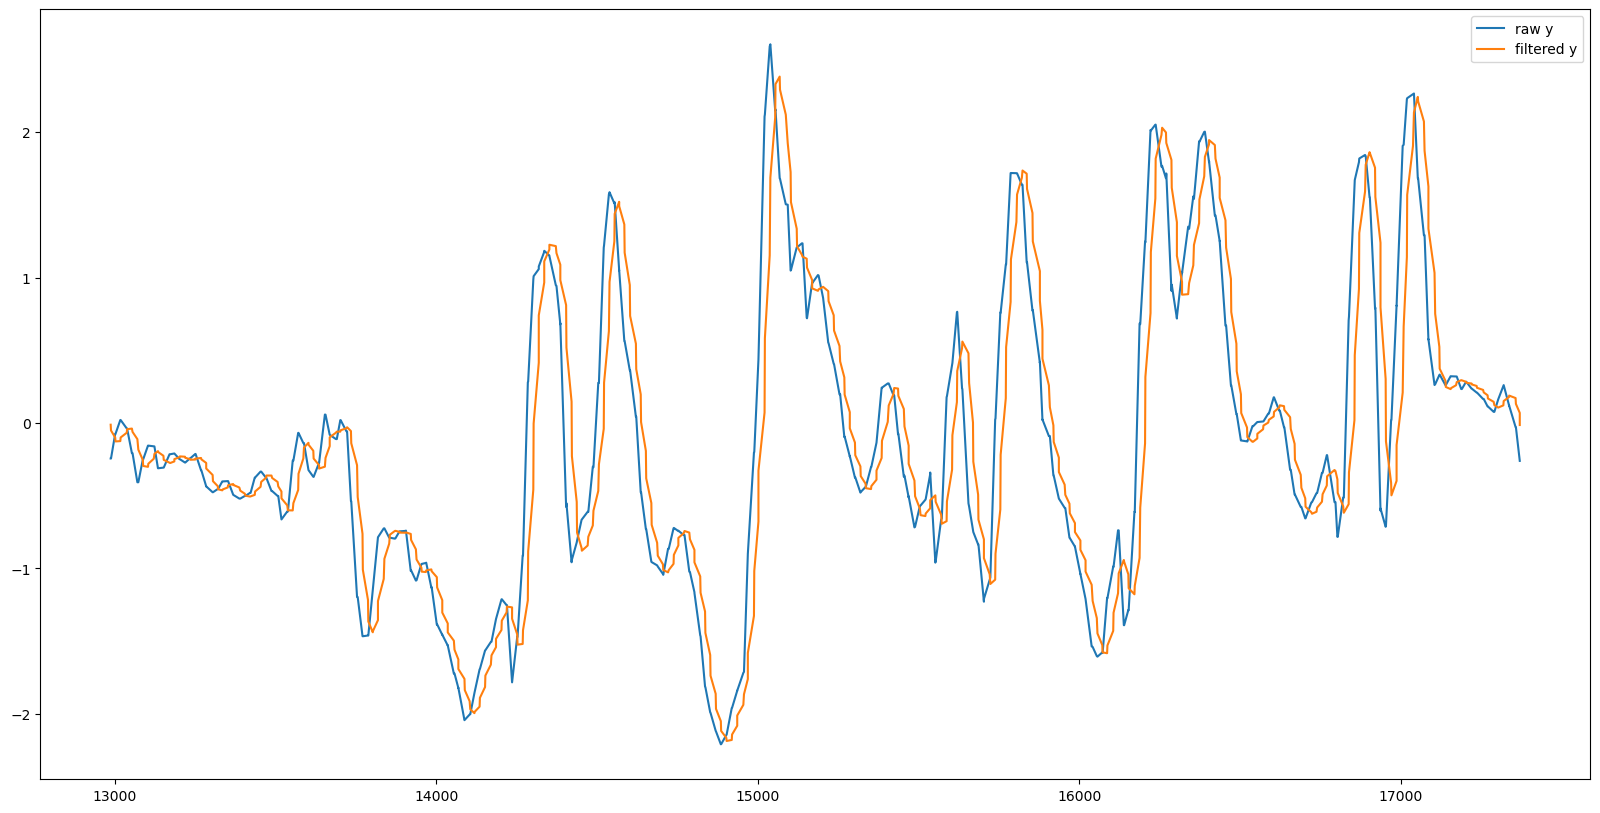

In [128]:
axis = "y"
plt.figure(figsize=(20,10))
plt.plot(df["time"], df[axis], label="raw "+axis)
plt.plot(df["time"], [i[ord(axis) - ord("x")] for i in accelerationFiltered], label="filtered "+axis)
plt.legend()

velocity

In [129]:
velocity = [np.zeros(3)]

for cnt in range(0, len(df)-1):
    velocity.append(velocity[cnt] + accelerationFiltered[cnt] * samplingRate)

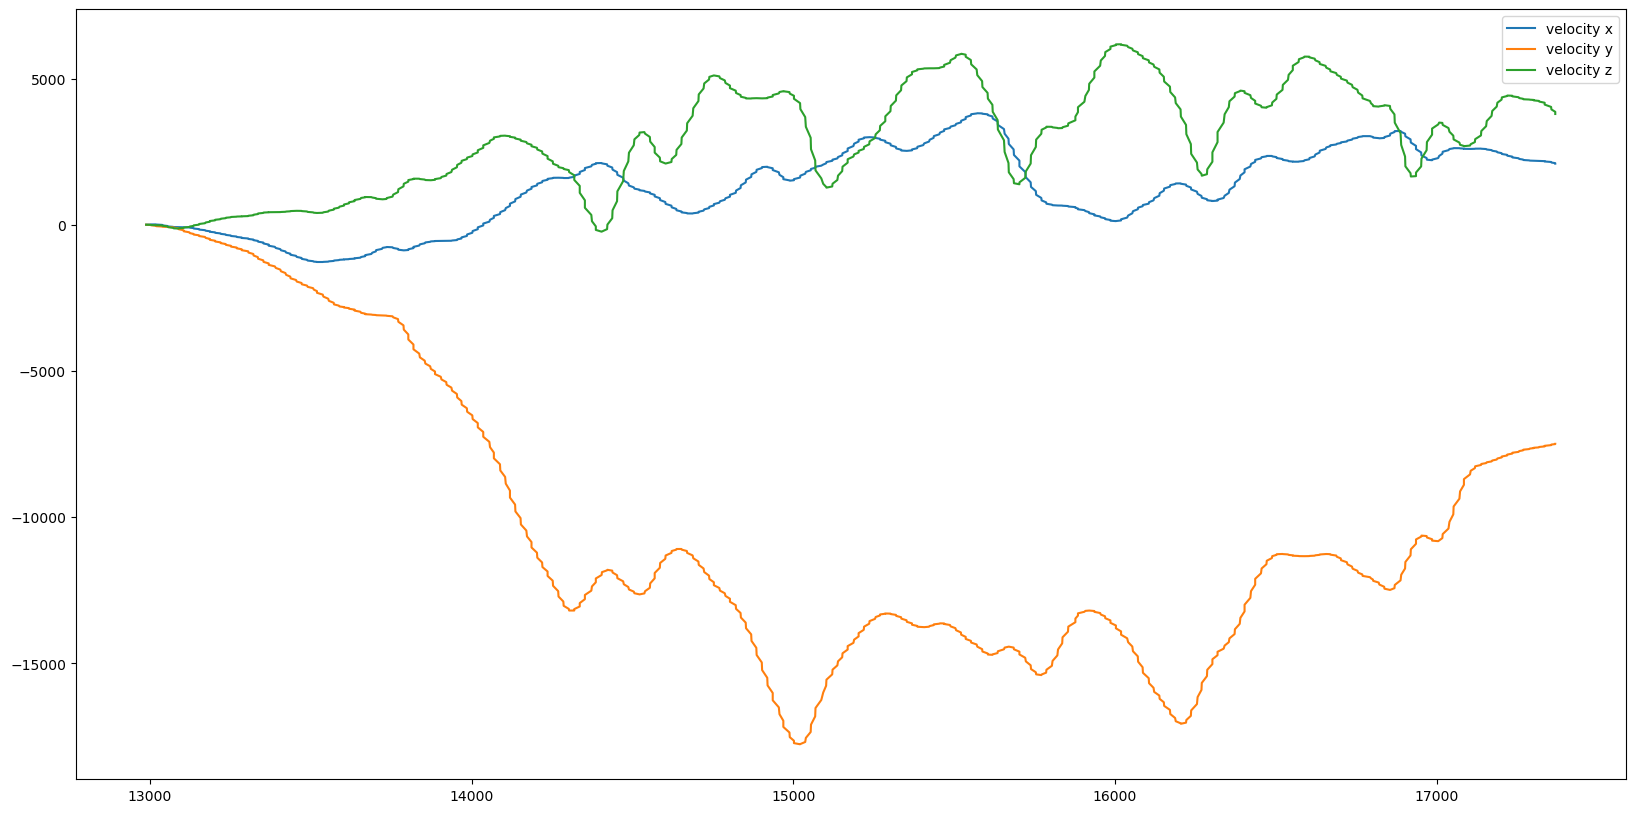

In [130]:
plt.figure(figsize=(20,10))
plt.plot(df["time"], [i[0] for i in velocity], label="velocity x")
plt.plot(df["time"], [i[1] for i in velocity], label="velocity y")
plt.plot(df["time"], [i[2] for i in velocity], label="velocity z")
plt.legend()


distance

In [131]:
distance = np.zeros(3)

for cnt in range(0, len(velocity)):
    distance += velocity[cnt] * samplingRate
    
distance

array([ 7.99306481e+07, -6.50219359e+08,  1.88135744e+08])